In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance - insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:

#checking shape
print(df.shape)

#checking null values
df.isnull().sum()

(1338, 7)


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [4]:
#take the categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [5]:
#handle the categorical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])
df["sex"] = label_encoder.fit_transform(df["sex"])
df["smoker"] = label_encoder.fit_transform(df["smoker"])

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
#dependent and independent variables
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [10]:
#Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

# Display features with high VIF (typically > 5 or 10)
print(vif_data)
#if it his higher than 5 , it has high collinearity

    Feature       VIF
0       age  1.015394
1       sex  1.008889
2       bmi  1.040608
3  children  1.002482
4    smoker  1.006466
5    region  1.025966


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [12]:
#accuracy checking
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
preds = model.predict(x_test)
r2 = r2_score(preds,y_test)
mae = mean_absolute_error(preds,y_test)
mse = mean_squared_error(preds,y_test)
rmse = np.sqrt(mse)
evs = explained_variance_score(preds,y_test)
print(f"mean Absolute error: {mae}")
print(f"mean Squared error: {mse}")
print(f"r2 score: {r2}")
print(f" Root mean Squared error: {rmse}")
print(f" Explained variance score: {evs}")

mean Absolute error: 4056.1183056626537
mean Squared error: 35480663.81217907
r2 score: 0.6736534266647523
 Root mean Squared error: 5956.564766052584
 Explained variance score: 0.6736727003337695


In [13]:
#for adjusted r-squared
# Number of observations and predictors
n = len(y)
p = x_scaled.shape[1]

# Calculate Adjusted R^2
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R^2: {r2_adj:.4f}")

Adjusted R^2: 0.6722


In [14]:
# Predict and calculate residuals
residuals = y_test - preds

# Calculate RSS
rss = (residuals ** 2).sum()
print(f"Residual Sum of Squares: {rss:.4f}")

Residual Sum of Squares: 9508817901.6640


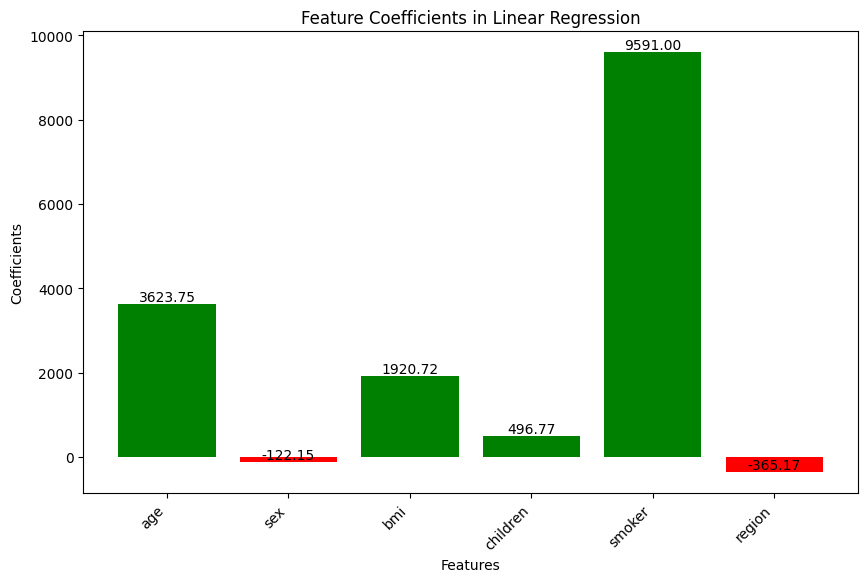

In [16]:
# Get the coefficients from the model
coefficients = model.coef_
features = df.iloc[:,:-1].columns

# Create a bar chart of coefficients
plt.figure(figsize=(10, 6))
bars = plt.bar(features, coefficients,color=np.where(coefficients > 0, 'green', 'red'))
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Coefficients in Linear Regression')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()

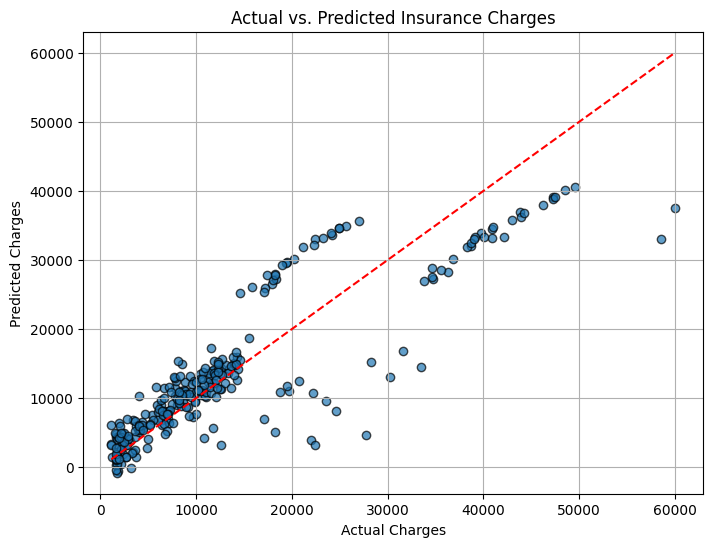

In [18]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, edgecolor='k', alpha=0.7)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()

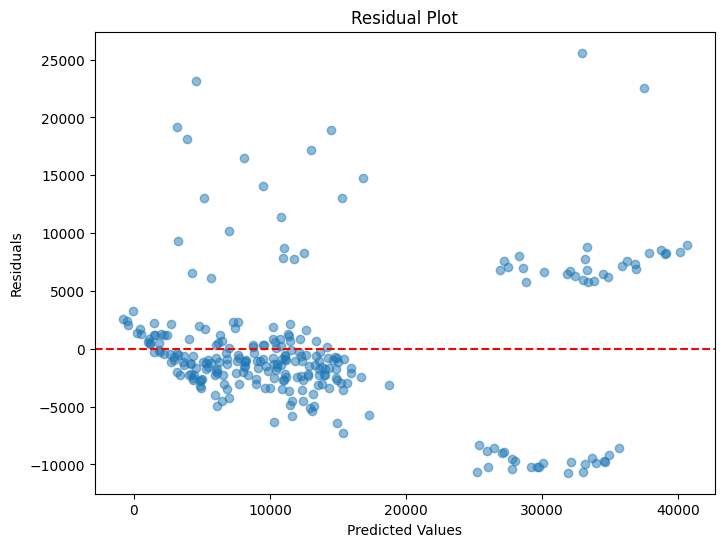

In [19]:

residuals = y_test - preds

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(preds, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()